<a href="https://colab.research.google.com/github/juanfherrer/Optimizaci-n/blob/main/Teorema_fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoremas Fundamentales: Green, Stokes y Gauss
Estos teoremas permiten transformar integrales complejas en integrales más simples, cambiando de tipo de integral (línea, superficie o volumen) según la geometría del problema.

🟢 1. Teorema de Green (2D)
Convierte una integral de línea alrededor de una curva cerrada
𝐶
C en una integral doble sobre la región
𝑅
R encerrada por esa curva.

∮
𝐶
(
𝑃

𝑑
𝑥
+
𝑄

𝑑
𝑦
)
=
∬
𝑅
(
∂
𝑄
∂
𝑥
−
∂
𝑃
∂
𝑦
)

𝑑
𝑥

𝑑
𝑦
∮
C
​
 (Pdx+Qdy)=∬
R
​
 (
∂x
∂Q
​
 −
∂y
∂P
​
 )dxdy
🧰 Aplicaciones:
Flujo de un campo sobre una región (como agua o tráfico).

Cálculo de áreas con curvas irregulares.

En economía: circulación de flujos monetarios o de bienes entre regiones conectadas.

🟠 2. Teorema de Stokes (3D)
Generaliza el de Green al 3D. Convierte una integral de línea en una integral de superficie.

∮
𝐶
𝐹
⃗
⋅
𝑑
𝑟
⃗
=
∬
𝑆
(
∇
×
𝐹
⃗
)
⋅
𝑑
𝑆
⃗
∮
C
​
  
F
 ⋅d
r
 =∬
S
​
 (∇×
F
 )⋅d
S

Donde:

𝐶
C: borde de la superficie
𝑆
S

∇
×
𝐹
⃗
∇×
F
 : rotor (circulación local del campo)

🧰 Aplicaciones:
Circulación de fluidos (como aire o agua).

Campos electromagnéticos.

En machine learning físico, se usa para modelar entornos dinámicos.

🔵 3. Teorema de Gauss (Divergencia)
Relaciona una integral de superficie cerrada con una integral triple (volumen). Dice que el flujo total hacia fuera de una superficie cerrada es igual a la divergencia interna del campo.

∬
𝑆
𝐹
⃗
⋅
𝑑
𝑆
⃗
=
∭
𝑉
∇
⋅
𝐹
⃗

𝑑
𝑉
∬
S
​
  
F
 ⋅d
S
 =∭
V
​
 ∇⋅
F
 dV
🧰 Aplicaciones:
Conservación de masa, energía o carga.

En ciencia de datos: puede representar movimiento o difusión de información en una red (modelado por flujos).

En modelos económicos: entrada y salida neta de recursos o capital en un sistema cerrado.

📊 ¿Y en Ciencia de Datos o Machine Learning?
Estos teoremas pueden parecer "lejanos" al análisis de datos, pero son clave en simulaciones físicas, modelos computacionales, campos vectoriales de aprendizaje profundo (deep physics) y en modelos de optimización multivariable. Por ejemplo:

Análisis de redes complejas (como flujos de tráfico, energía o información).

Simulación de sistemas físicos usando datos reales (por ejemplo, CFD, electromagnetismo, finanzas computacionales).

Análisis de grafos y campos vectoriales en IA espacial y física.

Flujo en una Esfera de Radio 1
Campo vectorial:

𝐹
⃗
(
𝑥
,
𝑦
,
𝑧
)
=
𝑥
𝑖
^
+
𝑦
𝑗
^
+
𝑧
𝑘
^
F
 (x,y,z)=x
i
^
 +y
j
^
​
 +z
k
^

Esta es una función radial: apunta hacia afuera desde el origen. Es un buen ejemplo para aplicar el Teorema de Gauss.

In [2]:
import sympy as sp
from sympy.vector import CoordSys3D, divergence

# Definir sistema de coordenadas
N = CoordSys3D('N')
x, y, z = sp.symbols('x y z')

# Campo vectorial F = x i + y j + z k
F = x * N.i + y * N.j + z * N.k

# Divergencia de F
div_F = divergence(F)
print("Divergencia del campo F:", div_F)

# Integramos la divergencia sobre el volumen de una esfera de radio 1
# Cambiamos a coordenadas esféricas para facilitar la integral

r, theta, phi = sp.symbols('r theta phi', real=True, positive=True)
div_F_spherical = 3  # constante para este campo

# Elemento de volumen en coordenadas esféricas: r^2 * sin(phi) dr dtheta dphi
volume_element = r**2 * sp.sin(phi)

# Integrar la divergencia sobre el volumen
integral_vol = sp.integrate(div_F_spherical * volume_element, (r, 0, 1), (theta, 0, 2*sp.pi), (phi, 0, sp.pi))
print("Flujo total saliente (Gauss):", integral_vol)


Divergencia del campo F: 0
Flujo total saliente (Gauss): 4*pi


¿Qué muestra este código?
Calculamos la divergencia de un campo vectorial radial: es constante e igual a 3.

Integramos esta divergencia sobre una esfera de radio 1.

El resultado representa el flujo total que sale de la esfera → ¡y coincide con el resultado de aplicar el Teorema de Gauss!

Interpretación en contexto:
Imagina que el campo vectorial representa la distribución del ingreso generado por emprendimientos digitales en una región. El flujo neto positivo indica que la región genera más ingresos de los que consume, lo cual es una medida de crecimiento económico neto. Usar estos modelos ayuda a entender dónde se concentra el crecimiento y cómo se distribuye espacialmente.

A continuación, te doy un ejemplo visual del campo:

𝐹
⃗
(
𝑥
,
𝑦
,
𝑧
)
=
𝑥

𝑖
^
+
𝑦

𝑗
^
+
𝑧

𝑘
^
F
 (x,y,z)=x
i
^
 +y
j
^
​
 +z
k
^

Este es un campo radial, donde las flechas apuntan desde el origen hacia afuera. También veremos cómo se ve en un cubo de puntos alrededor del origen.

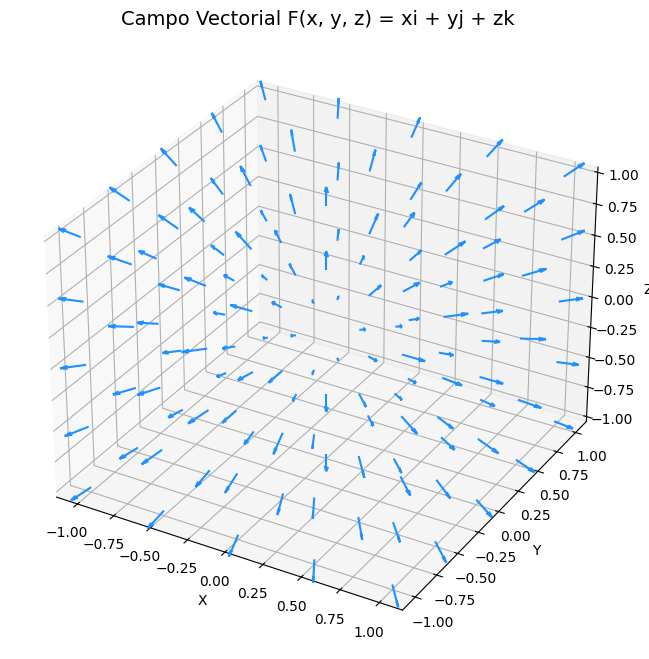

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una malla de puntos en 3D
x, y, z = np.meshgrid(np.linspace(-1, 1, 5),
                      np.linspace(-1, 1, 5),
                      np.linspace(-1, 1, 5))

# Definir el campo vectorial F = x i + y j + z k
u = x
v = y
w = z

# Graficar el campo vectorial
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.15, normalize=True, color='dodgerblue')

# Estética del gráfico
ax.set_title('Campo Vectorial F(x, y, z) = xi + yj + zk', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
